# Thinking About Risk and Uncertainty Through Probability Distributions

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Coin toss
Or any random event with two mutually exclusive outcomes.

In [2]:
p = 0.5 # Probability of "success".

# One Bernoulli trial (aka coin toss).
np.random.choice(['Heads', 'Tails'], p=[p, 1 - p])

'Tails'

In [3]:
np.random.choice(['Heads', 'Tails'], p=[p, 1 - p], size=50)

array(['Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads',
       'Heads'], dtype='<U5')

In [4]:
n = 50 # Sample size.

x = np.random.choice(['Heads', 'Tails'], p=[p, 1 - p], size=n)
pd.Series(x).value_counts()

Heads    26
Tails    24
dtype: int64

In [5]:
n = 50 # Sample size.

x = np.random.choice(['Heads', 'Tails'], p=[p, 1 - p], size=n)
pd.Series(x).value_counts() / n

Tails    0.52
Heads    0.48
dtype: float64

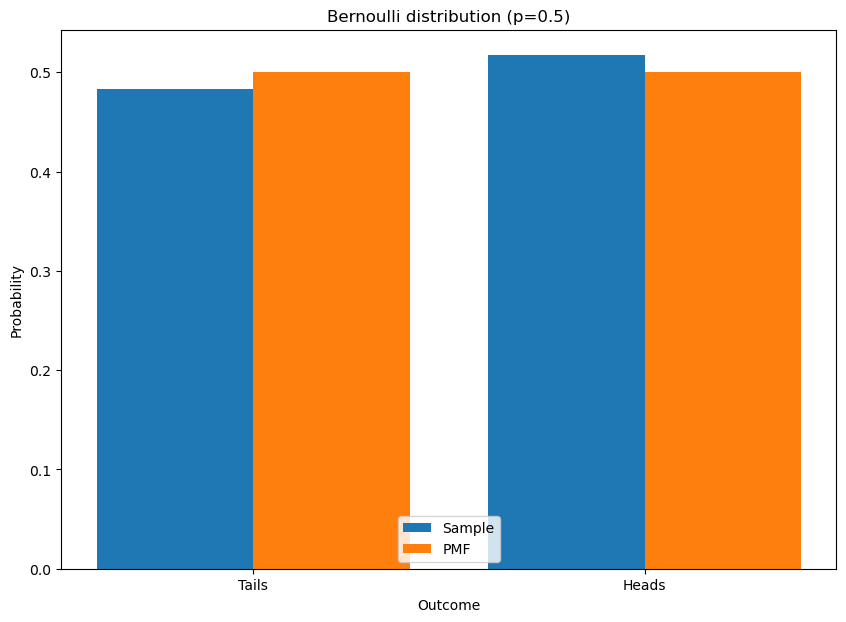

In [6]:
p = 0.5  # Probability of "success".
n = 1000 # Sample size.

x = stats.bernoulli.rvs(p, size = n)
bernoulli_sample = pd.Series(x).value_counts() / n
bernoulli_pmf = stats.bernoulli.pmf([0, 1], p)

fig = plt.figure(figsize=(10, 7))
width = 0.4
plt.bar(bernoulli_sample.index - width / 2, bernoulli_sample, width=width)
plt.bar(pd.Series([0, 1]) + width / 2, bernoulli_pmf, width=width)
plt.xticks([0, 1], ['Tails', 'Heads'])

plt.title('Bernoulli distribution (p=%.1f)' % p)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'], loc='lower center')

plt.show()

## Binomial distribution
Probability of getting exaclty $k$ successes out of $n$ Bernoulli trials with probability $p$.

In [7]:
k = 5   # Number of "successes".
n = 10  # Number of Bernoulli trials.
p = 0.5 # Probability of "success".

stats.binom.pmf(k, n, p)

0.24609375000000003

In [8]:
# Probability mass function.
stats.binom.pmf([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], n, p)

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507812,
       0.24609375, 0.20507812, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

In [9]:
# Random variates.
stats.binom.rvs(n, p)

4

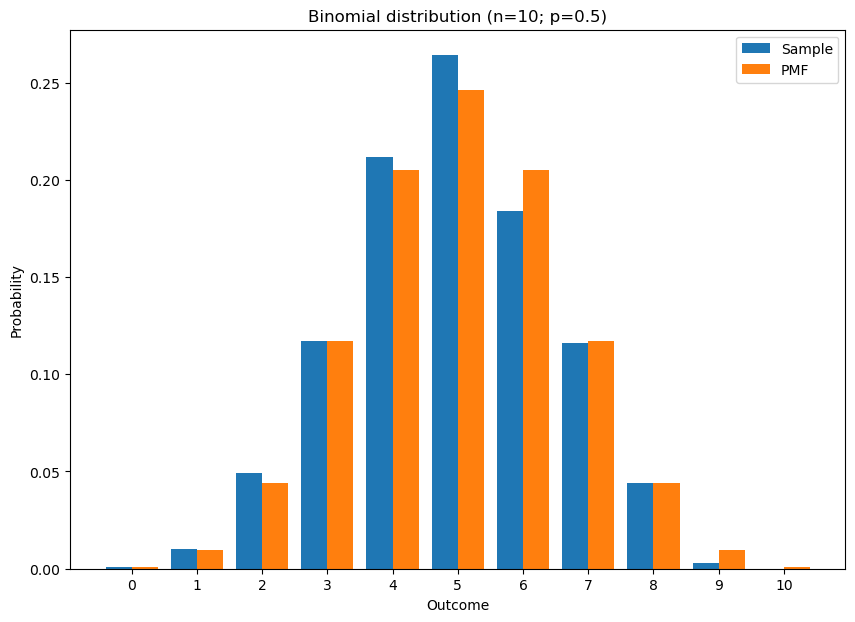

In [10]:
n = 10   # Sample size (number of Bernoulli trials).
p = 0.5  # Probability of "success".
s = 1000 # Sample size.

k = stats.binom.rvs(n, p, size = s)
binomial_sample = pd.Series(k).value_counts() / s
binomial_pmf = stats.binom.pmf(np.arange(n + 1), n, p)

plt.figure(figsize=(10, 7))
width = 0.4
plt.bar(binomial_sample.index - width / 2, binomial_sample, width=width)
plt.bar(np.arange(n + 1) + width / 2, binomial_pmf, width=width)
plt.xticks(np.arange(n + 1))

plt.title('Binomial distribution (n=%d; p=%.1f)' % (n, p))
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

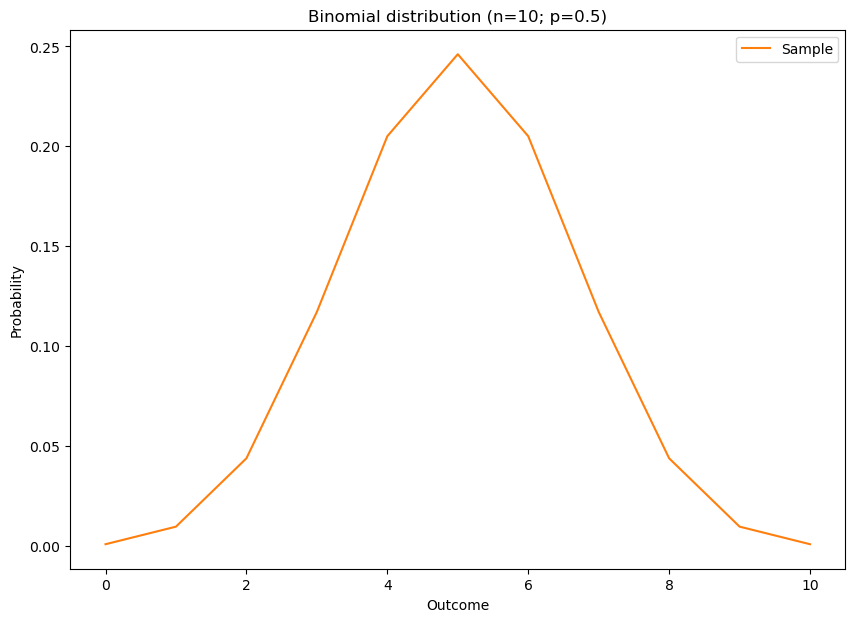

In [11]:
n = 10   # Sample size (number of Bernoulli trials).
p = 0.5  # Probability of "success".

binomial_pmf = stats.binom.pmf(np.arange(n + 1), n, p)

plt.figure(figsize=(10, 7))
plt.plot(np.arange(n + 1), binomial_pmf, c='tab:orange')

plt.title('Binomial distribution (n=%d; p=%.1f)' % (n, p))
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

## Central Limit Theorem
A sum of independent random variables is normally distributed.

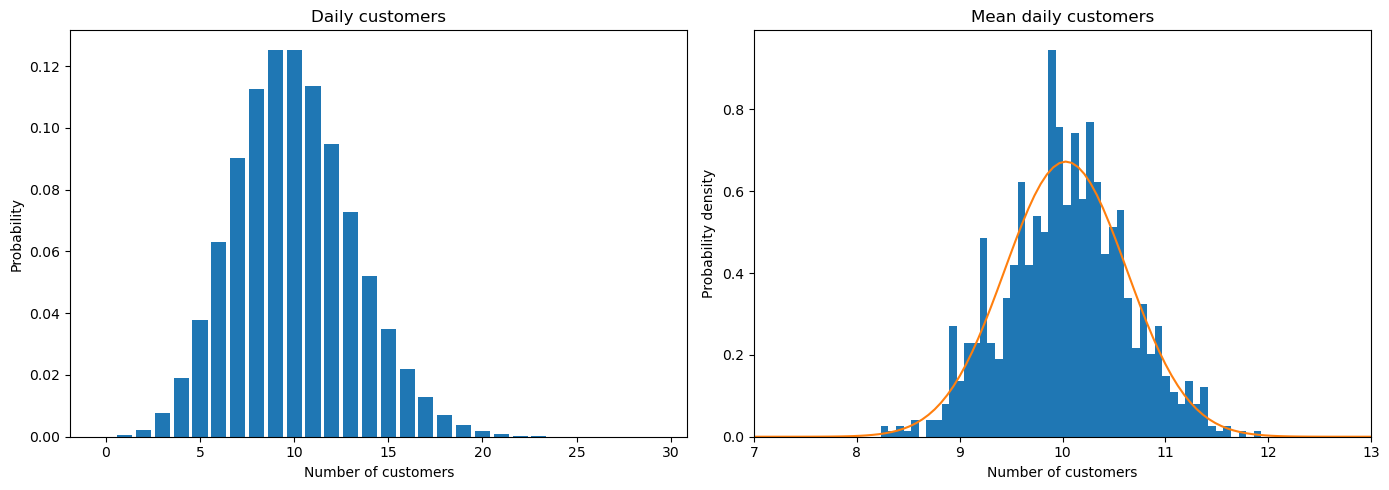

In [12]:
mu = 10
s = 10**6 # Population size.

n_customers = stats.poisson.rvs(mu, size=s)
n_customers = n_customers - np.mean(n_customers) + mu # Fake mean stabilization for the example.

n = 30 # Sample size.

mean_d = sorted(np.mean(np.random.choice(n_customers, n)) for i in range(1000)) # Sample of the means.

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

n_cust_dist = pd.Series(n_customers).value_counts() / s
ax[0].bar(n_cust_dist.index, n_cust_dist)
ax[1].hist(mean_d, bins=50, density=True)

window = 3
x = np.linspace(mu - window, mu + window, 100)
ax[1].plot(x, stats.norm.pdf(x, np.mean(mean_d), np.std(mean_d)))
ax[1].set_xlim(mu - window, mu + window)
ax[0].set_title('Daily customers')
ax[0].set_xlabel('Number of customers')
ax[0].set_ylabel('Probability')
ax[1].set_title('Mean daily customers')
ax[1].set_xlabel('Number of customers')
ax[1].set_ylabel('Probability density')

plt.tight_layout()
plt.show()

## Normal distribution
Following the Retail Problem presented in Video 2.5, given that the average demand is 800 units and its standard deviation is 250 units:
1. What is the fill rate of an inventory with 1,000 units?
2. What inventory level is needed to secure a 95% fill rate?

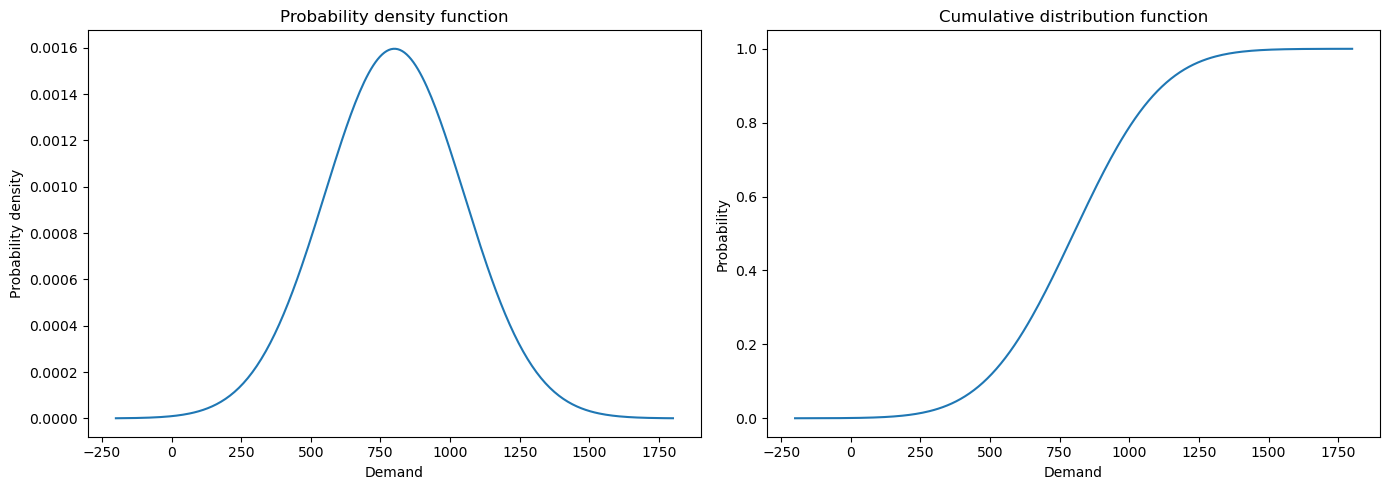

In [13]:
mu = 800
sd = 250

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(mu - sd * 4, mu + sd * 4, sd)
ax[0].plot(x, stats.norm.pdf(x, loc=mu, scale=sd))
ax[1].plot(x, stats.norm.cdf(x, loc=mu, scale=sd))

ax[0].set_title('Probability density function')
ax[0].set_xlabel('Demand')
ax[0].set_ylabel('Probability density')
ax[1].set_title('Cumulative distribution function')
ax[1].set_xlabel('Demand')
ax[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

### Question 1

In [14]:
inventory = 1000
fill_rate = stats.norm.cdf(inventory, loc=mu, scale=sd)
fill_rate

0.7881446014166034

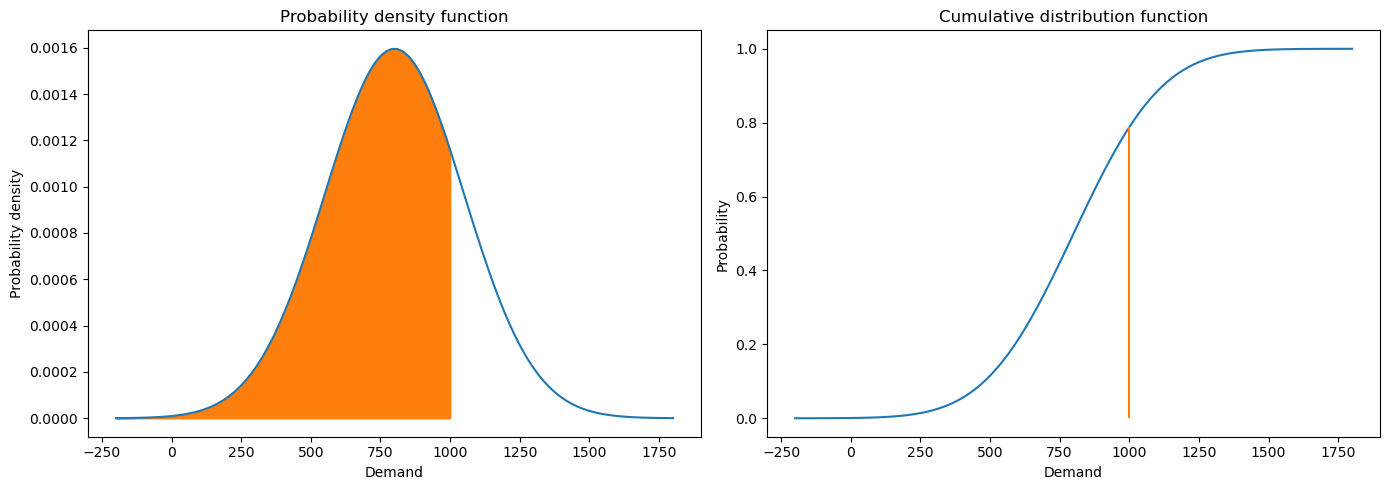

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(mu - sd * 4, mu + sd * 4, 100)
ax[0].plot(x, stats.norm.pdf(x, loc=mu, scale=sd))
ax[1].plot(x, stats.norm.cdf(x, loc=mu, scale=sd))

p = np.linspace(mu - sd * 4, inventory, 100)
ax[0].fill_between(p, stats.norm.pdf(p, loc=mu, scale=sd), 0, color='tab:orange', alpha=1)
ax[1].vlines(inventory, 0, fill_rate, colors=['tab:orange'])

ax[0].set_title('Probability density function')
ax[0].set_xlabel('Demand')
ax[0].set_ylabel('Probability density')
ax[1].set_title('Cumulative distribution function')
ax[1].set_xlabel('Demand')
ax[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

### Question 2

In [16]:
fill_rate = 0.95
inventory = stats.norm.ppf(fill_rate, loc=mu, scale=sd) # Percent point function (inverse of CDF).
inventory

1211.2134067378681

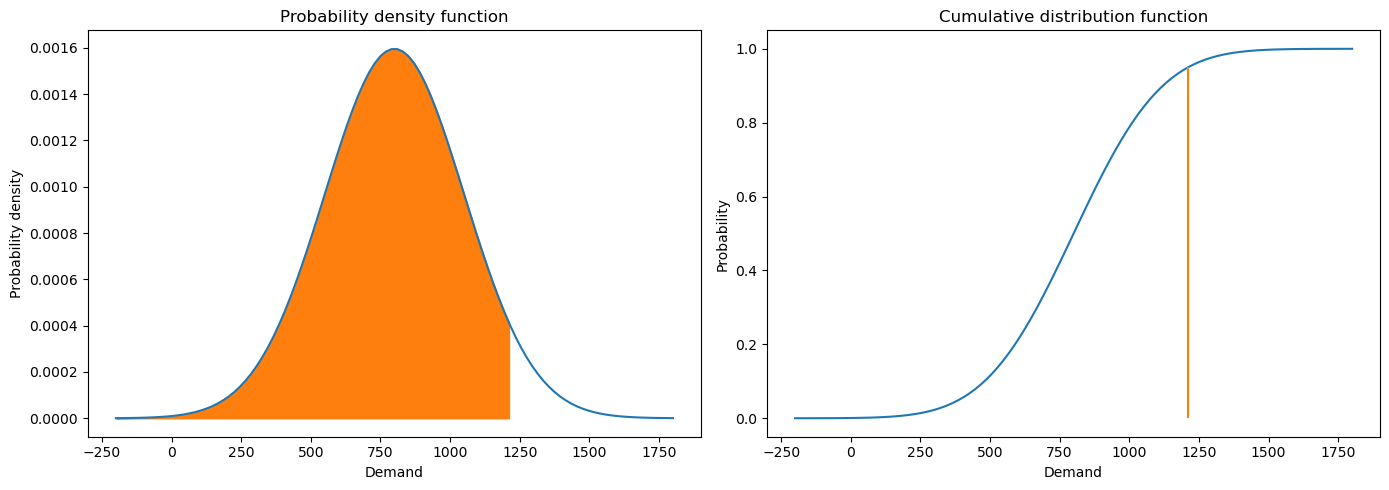

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(mu - sd * 4, mu + sd * 4, 100)
ax[0].plot(x, stats.norm.pdf(x, loc=mu, scale=sd))
ax[1].plot(x, stats.norm.cdf(x, loc=mu, scale=sd))

p = np.linspace(mu - sd * 4, inventory, 100)
ax[0].fill_between(p, stats.norm.pdf(p, loc=mu, scale=sd), 0, color='tab:orange', alpha=1)
ax[1].vlines(inventory, 0, fill_rate, colors=['tab:orange'])

ax[0].set_title('Probability density function')
ax[0].set_xlabel('Demand')
ax[0].set_ylabel('Probability density')
ax[1].set_title('Cumulative distribution function')
ax[1].set_xlabel('Demand')
ax[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()